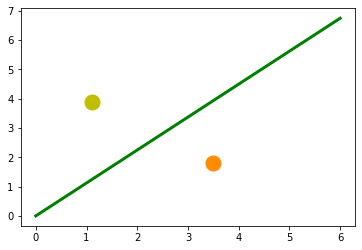

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

ax.plot(3.5, 1.8, "or",color="darkorange",markersize=15)
ax.plot(1.1, 3.9, "oy",markersize=15)

point_on_line = (4, 4.5)

# calculate gradient:
m = point_on_line[1] / point_on_line[0]
X = np.arange(0, 7)
ax.plot(X, m * X, "g-", linewidth=3)

#plt.show()






In [3]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4

# check if orange is below the line,
# positive value is expected:
print(orange[0] * m - orange[1])

# check if lemon is above the line,
# negative value is expected:
print(lemon[0] * m - lemon[1])

A=(4,4.5)
# check if A is on the line,
# 0 value is expected:
print(A[0] * m - A[1])

2.1375
-2.6624999999999996
0.0


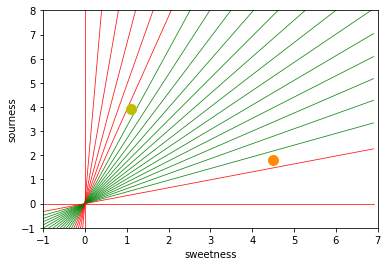

In [4]:
import matplotlib.pyplot as plt
import numpy as np


def create_distance_function(a, b, c):
    """ 0 = ax + by + c """

    def distance(x, y):
        """
        returns tuple (d, pos)
        d is the distance
        If pos == -1 point is below the line,
        0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom < 0 and b < 0) or (nom > 0 and b > 0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt(a ** 2 + b ** 2), pos)

    return distance

orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)

step = 0.05
for x in np.arange(0, 1 + step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)

size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index == 0:
        ax.plot(x, y, "o",color="darkorange",markersize=size)
    else:
        ax.plot(x, y, "oy",markersize=size)

#plt.show()

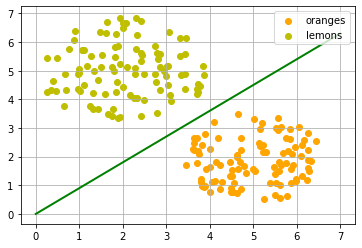

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def points_within_circle(radius,center=(0, 0),number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y



oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

fig, ax = plt.subplots()
ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")
X = np.arange(0, 8)
ax.plot(X, 0.9 * X, "g-", linewidth=2)

ax.legend()
ax.grid()
#plt.show()

0.8999999999999999


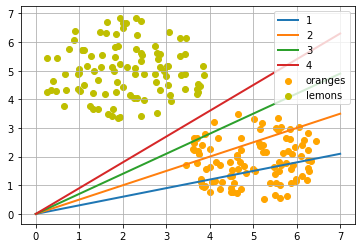

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle




slope = 0.1

fig, ax = plt.subplots()
ax.scatter(oranges_x,oranges_y,c="orange",label="oranges")
ax.scatter(lemons_x,lemons_y,c="y",label="lemons")

fruits = list(zip(oranges_x,
                  oranges_y,
                  repeat(0, len(oranges_x))))#0 for orange
fruits += list(zip(lemons_x,
                   lemons_y,
                   repeat(1, len(oranges_x))))#1 for lemon
shuffle(fruits)
learning_rate = 0.2

line = None
counter = 0
X = np.arange(0, 8)

for x, y, label in fruits:
    res = slope * x - y
    if label == 0 and res < 0:
        # point is above line but should be below
        # => increment slope
        slope += learning_rate
        counter += 1
        ax.plot(X, slope * X,
                linewidth=2, label=str(counter))

    elif label == 1 and res > 0:
        # point is below line but should be above
        # => decrement slope
        slope -= learning_rate
        counter += 1
        ax.plot(X, slope * X,
                linewidth=2, label=str(counter))

ax.legend()
ax.grid()
#plt.show()

print(slope)

-1.526096530029985, -1.003600484356028, -1.092769772557525, -1.1579294184000635, -1.373524994963841, -0.9778417524403498, -1.41537334084897, -1.3493107721691908, -1.7168677136417472, -1.2741672528950718, 

1.8985599746053567, 1.7745062878149578, 2.3780435728936187, 2.3374347961476234, 1.105495380983894, 1.5526173210925973, 2.074459368748493, 0.874783571297451, 0.6385685100135223, 1.23225339580723, 

Counter({'corrects': 200})
0.9


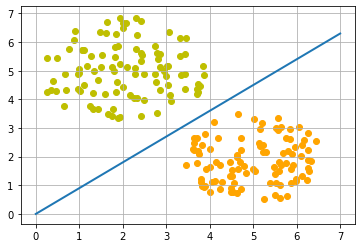

In [7]:
import numpy as np




class Perceptron:

    def __init__(self, weights):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)

    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum


p = Perceptron(weights=[-0.45, 0.5])

for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")
print()
print()
for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")

#Calculate accurcy

from collections import Counter
evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1


for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1
print()
print()
print(evaluation)


import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")

slope = 0.45 / 0.5
X = np.arange(0, 8)
ax.plot(X, slope * X,  linewidth=2)


ax.grid()
#plt.show()

print(slope)

In [8]:
from sklearn.model_selection import train_test_split
import random
import numpy as np




oranges = list(zip(oranges_x, oranges_y))#list of tuple
lemons = list(zip(lemons_x, lemons_y))#list of tuple

# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons,
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)

data, labels = zip(*labelled_data)

res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res


[('correct', 160)]
[('correct', 40)]
[-1.04581238  1.15431358]


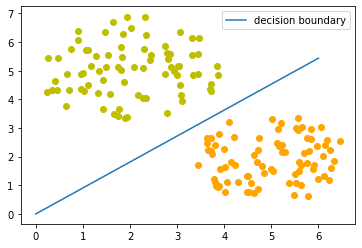

[-1.04581238  1.15431358]
2 -2.0827010769150163 [-1.65077235 -0.79261127] (5.835907848157254, 2.9753709141534115)
5 0.9060037110957316 [-1.04581238  1.15431358] (2.0165332341082554, 6.489749502992677)


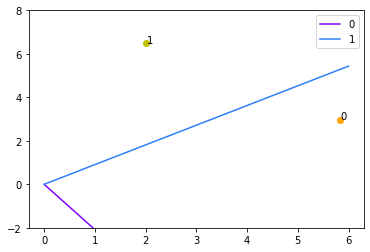

In [9]:
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import random
import numpy as np



class Perceptron:

    def __init__(self,
                 weights,
                 learning_rate=0.1):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate

    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        else:
            return 1

    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        # print(in_data, weighted_input, weighted_sum)
        return Perceptron.unit_step_function(weighted_sum)

    def adjust(self,
               target_result,
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  #
        error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction
            #print(target_result, calculated_result, error, in_data, correction, self.weights)

    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]), 0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation


p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)

for index in range(len(train_data)):
    p.adjust(train_labels[index],
             p(train_data[index]),
             train_data[index])

evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())
print(p.weights)



import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)

ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")

w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
X = np.arange(0, 7)
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)





import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))

fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])

counter = 0
X = np.arange(0, 7)
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index],
             p(train_data[index]),
             train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else "y"
        ax.scatter(train_data[index][0],
                   train_data[index][1],
                   color=color)
        ax.annotate(str(counter),
                    (train_data[index][0], train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1

ax.legend()
#plt.show()
